# ARIMA MODEL

In [ ]:
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# Import libraries
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = read_csv('/content/Inflation Rate  (montly) (1).csv', header=0, index_col=0, parse_dates=True)

# Persistence/ Base model

In [ ]:
# separate out a validation dataset
split_point = len(data) - 148
dataset, validation = data[0:split_point], data[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 345, Validation 148


In [ ]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('/content/dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [ ]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=10.197, Expected=10.171
>Predicted=10.171, Expected=10.145
>Predicted=10.145, Expected=10.118
>Predicted=10.118, Expected=10.092
>Predicted=10.092, Expected=10.066
>Predicted=10.066, Expected=10.040
>Predicted=10.040, Expected=10.014
>Predicted=10.014, Expected=9.988
>Predicted=9.988, Expected=9.962
>Predicted=9.962, Expected=9.918
>Predicted=9.918, Expected=9.874
>Predicted=9.874, Expected=9.830
>Predicted=9.830, Expected=9.785
>Predicted=9.785, Expected=9.741
>Predicted=9.741, Expected=9.697
>Predicted=9.697, Expected=9.653
>Predicted=9.653, Expected=9.609
>Predicted=9.609, Expected=9.564
>Predicted=9.564, Expected=9.520
>Predicted=9.520, Expected=9.476
>Predicted=9.476, Expected=9.432
>Predicted=9.432, Expected=9.216
>Predicted=9.216, Expected=9.000
>Predicted=9.000, Expected=8.785
>Predicted=8.785, Expected=8.569
>Predicted=8.569, Expected=8.353
>Predicted=8.353, Expected=8.137
>Predicted=8.137, Expected=7.921
>Predicted=7.921, Expected=7.705
>Predicted=7.705, Expected=7

# MODEL BUILDING FOR RMSE CHECK

In [ ]:
train1=pd.read_csv('/content/dataset.csv',header=0, index_col=0, parse_dates=True)
train1

,11.346
1980-01-31,
1980-02-29,11.45500
1980-03-31,11.56400
1980-04-30,11.67300
1980-05-31,11.78200
1980-06-30,11.89100
...,...
2008-05-31,10.16400
2008-06-30,10.43275
2008-07-31,10.70150


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


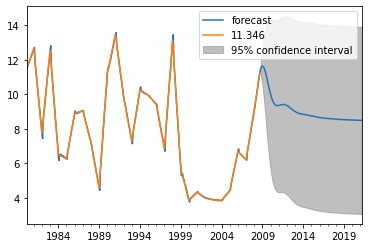

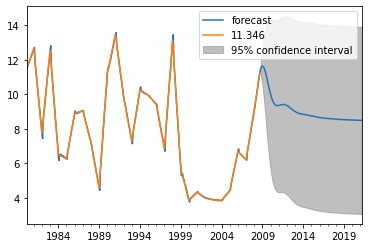

In [ ]:
# fit model
model = ARIMA(train1, order=(10,0,2))
model_fit = model.fit()
forecast=model_fit.forecast(steps=148)[0]
model_fit.plot_predict(1, 493)

# RMSE FOR ARIMA MODEL

In [ ]:
val=pd.read_csv('/content/validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

3.0547349329895495

# FINAL MODEL ORIGINAL DATA

In [ ]:
# FIT MODEL ON P D Q ORDER CALCULATED
data = read_csv('/content/Inflation Rate  (montly) (1).csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = data.values
X = X.astype('float32')

In [ ]:
model = ARIMA(X, order=(10,0,2))
model_fit = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


# FORECAST FOR NEXT 11 MONTHS

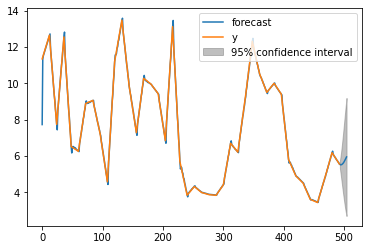

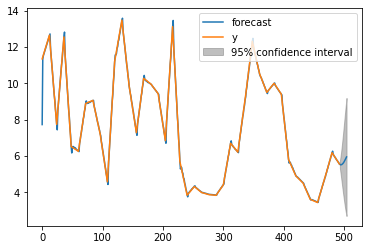

In [ ]:
forecast=model_fit.forecast(steps=11)[0]
model_fit.plot_predict(0,504)

In [ ]:
forecast

array([5.52802748, 5.50956492, 5.51031799, 5.51980088, 5.54519299,
       5.57751354, 5.62277998, 5.67484418, 5.73548604, 5.80038967,
       5.86931231])